# King County Housing Analysis
***************************************
### Author: Morgan Fell

![image](https://user-images.githubusercontent.com/20844445/228355779-0a7b778f-f5a7-473d-a3a0-ac3d4d1d3092.png)

## Overview
Home and Garden Television (HGTV) is interested in filming around the Seattle, WA area. In preparation, we have gathered historical home data for King County, WA to have an understanding of the market. Through our analysis we hope to provide stakeholders with evidence of target home features, renovation return on investment, and overall pricing. Shows on the network range from Home Hunters, where a family explores 3-4 options to buy, to house flipping. In order to front the budget for these shows, our stakeholders need to understand if this area is worth the expense. Our final model highlights that the living space, size of the home's lot, garage and patio sizing, and location contribute to the price of homes in the area. 

*****************************************
## Business Problem
Before filming begins, HGTV completes research to provide scripts, potential investment reality, and budget. We will focus our discovery on the following:
1. How many homes are available for renovation and what is the historical ROI for renovated homes?
2. Should our crews focus more on structural features (living space, bathrooms, bedrooms, etc.) or landscape (views, acres, garage, patio, etc.)
3. Are there other features that increase price such as having a home on the waterfront or a view?

*****************************************
## Data Understanding
Our data set has 30, 155 entries spanning 24 columns. The homes in the list were built between 1975 and 2022. You will find a detailed list of the columns below. Before starting the data provided a warning about outliers being expected in the location, so we will want to ensure the homes we're including in our model are only from King County. 

### Column Names and Descriptions for King County Data Set
   * `id` - Unique identifier for a house ,
   * `date` - Date house was sold ,
   * `price` - Sale price (prediction target) ,
   * `bedrooms` - Number of bedrooms ,
   * `bathrooms` - Number of bathrooms ,
   * `sqft_living` - Square footage of living space in the home ,
   * `sqft_lot` - Square footage of the lot ,
   * `floors` - Number of floors (levels) in house ,
   * `waterfront` - Whether the house is on a waterfront ,
       * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts ,
   * `greenbelt` - Whether the house is adjacent to a green belt ,
   * `nuisance` - Whether the house has traffic noise or other recorded nuisances ,
   * `view` - Quality of view from house ,
       * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other ,
   * `condition` - How good the overall condition of the house is. Related to maintenance of house. ,
      * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code ,
   * `grade` - Overall grade of the house. Related to the construction and design of the house. ,
      * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code ,
   * `heat_source` - Heat source for the house ,
   * `sewer_system` - Sewer system for the house ,
   * `sqft_above` - Square footage of house apart from basement ,
   * `sqft_basement` - Square footage of the basement ,
   * `sqft_garage` - Square footage of garage space ,
   * `sqft_patio` - Square footage of outdoor porch or deck space ,
   * `yr_built` - Year when house was built ,
   * `yr_renovated` - Year when house was renovated ,
   * `address` - The street address ,
   * `lat` - Latitude coordinate ,
   * `long` - Longitude coordinate ,
    
Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx)

## Data Exploration 

In [2]:
#importing necessary libriaries 
import pandas as pd #pandas will provide help with data manipulation
import numpy as np #allows quick operations on numerical data
import seaborn as sns #helps with data visualization
import matplotlib.pyplot as plt #plotting data tool
import folium #data visualization on a map
import scipy.stats as stats 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import PolynomialFeatures

In [3]:
king_raw = pd.read_csv("kc_house_data.csv") #assigning data to a pandas dataframe 
king_raw.head() #printing the first 5 rows of data from newly assigned dataframe 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
king_raw.info() #provides a summary of the dataframe so that we can understand the complete size, any missing data, and the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

So, we can see that heat_source and sewer_system have a few null values we may need to replace. We also want to change the date to a numerical data type so that we can utilize the timing of purchase. Our next steps will be to describe each of the numerical columns so that we gain an idea of statistical values. 

Let's look at the distribution of our values

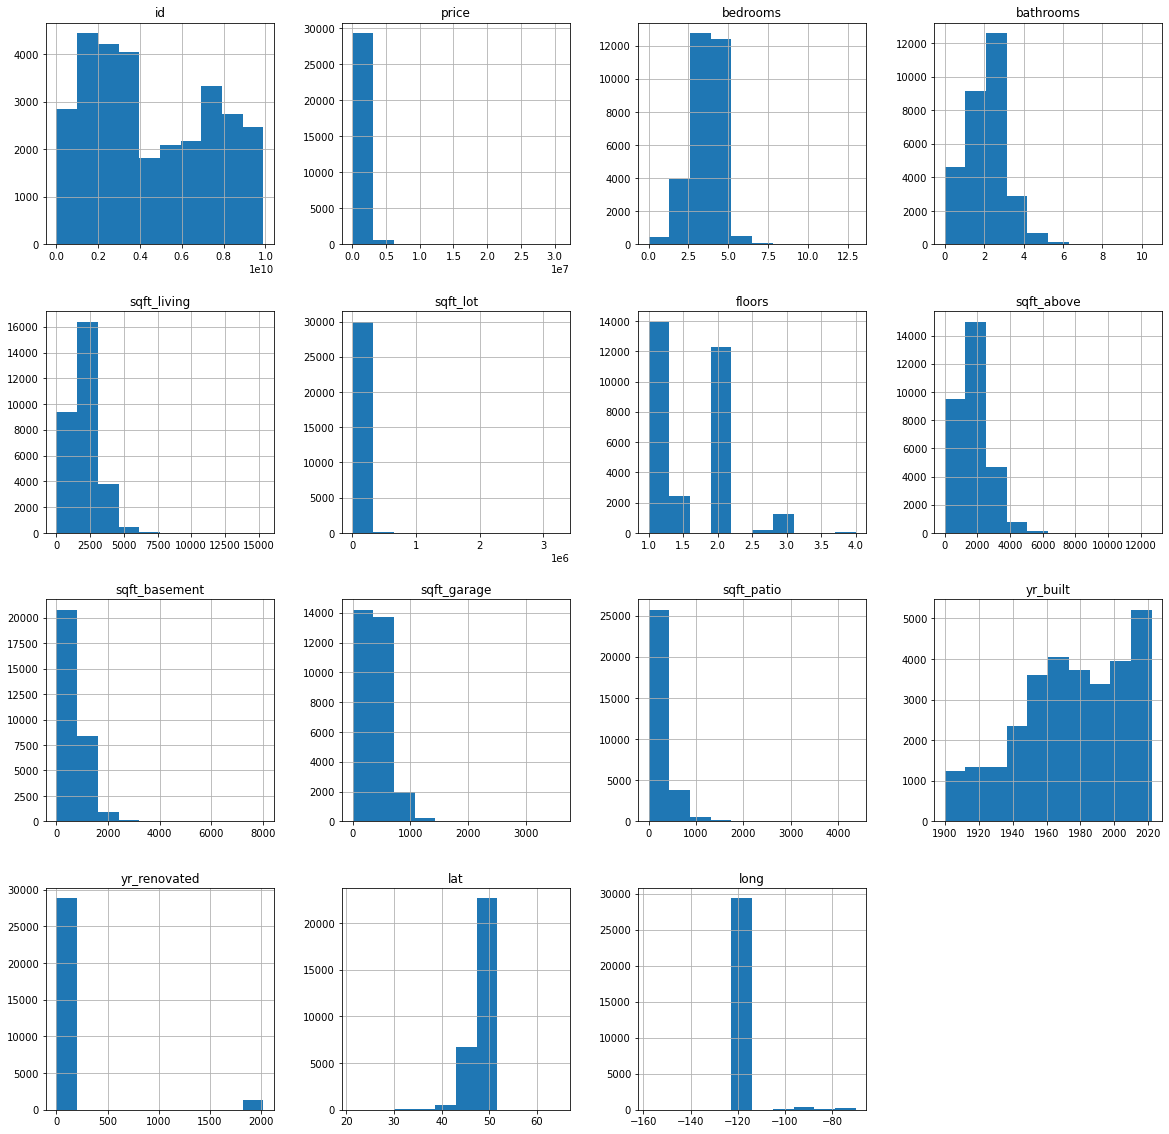

In [5]:
king_raw.hist(figsize=(20,20));

Almost all of our values do not have a normal distribution, which can create issues when performing linear regressions. I will address these distributions as we move into modeling. 

## Data Understanding

Our data set has 30,155 entries spanning 24 columns. The homes in the list were built between 1975 and 2022. You will find a detailed list of the columns below. Before starting the data provided a warning about outliers being expected in the location, so we will want to ensure the homes we're including in our model are only from King County.

I'm going to create a copy of the raw dataframe, then I want to start by clearing out the null values.

In [44]:
clean_king = king_raw.copy() #Creates a new dataframe that is a copy of the raw data

In [45]:
clean_king.isna().sum() #returns the total number of null values in each column

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Our data set has 30,155 entries. Seeing how few null values there are our first instinct might be to drop those rows; however, we don't want to risk decreasing the value of the other information in those rows. I'm going to look at the categories of data within both columns then convert the nulls to 'no' or '0'

In [46]:
clean_king.heat_source.value_counts() #Totals for the categories of heat_sources

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [47]:
clean_king['heat_source'] = clean_king['heat_source'].fillna('Other') #replaces any null values with Other

In [48]:
clean_king.heat_source.value_counts() #checks the column for increase to see if the replacement worked

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   52
Oil/Solar                4
Name: heat_source, dtype: int64

In [49]:
clean_king.isna().sum() #checks for null value changes

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source       0
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [50]:
clean_king.sewer_system.value_counts() #total for all categories in column

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [51]:
clean_king.loc[king_raw.sewer_system.isnull(), 'sewer_system'] = "NONE" #replaces null with NONE
clean_king.sewer_system.value_counts() #checks for new NONE category

PUBLIC                25777
PRIVATE                4355
NONE                     14
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [52]:
clean_king.isna().sum() #checks for null value changes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

Now that the null values are taken care of I can begin cleaning some of our columns. I'm going to start with date because I want to pull out the month in order to see if there is a shift in price due to season. Creating a new column for the age is my next step. By having the age of our homes I can give the stakeholder an idea of the range build years their crews want to look for when scoping out properties. Finally, I'll also add a column that turns the yr_renovated column into a 'yes(1)' or 'no(0)' for analysis. 

In [53]:
# Change to datetime and add month column
clean_king['date'] = pd.to_datetime(clean_king['date'])
clean_king['month'] = pd.DatetimeIndex(clean_king['date']).month

In [54]:
# Add house_age column by subtracting the year built from the date sold
clean_king['age'] = 2023 - clean_king['yr_built']

#Adds a column for 'if renovated' 
clean_king['renovated'] = clean_king['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [55]:
#Descriptive statistics to check the distribution and if outliers might be present
clean_king.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,month,age,renovated
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397,6.876969,47.836047,0.045498
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475,3.113640,32.067362,0.208398
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,1.000000,1.000000,0.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045,4.000000,20.000000,0.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585,7.000000,46.000000,0.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205,9.000000,70.000000,0.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,12.000000,123.000000,1.000000


### Takeaways:
- We were given a warning on the column details stating that due to the nature of the web scraping some of the homes are not within King County. The `lat` a mean of 47 and the `long` has a mean of -121 with a median of -122. I'm going to narrow of dataset to only allowing homes within those parameters. 
- I also noticed that the price has a maximum value of 30.7 million, which is an outlier and outside of the budget scope for HGTV. The code is selecting only the rows where the price value is between the 0.5th and 99.5th percentiles (i.e., excluding the top and bottom 0.5% of prices). This is achieved by using the logical operators & to combine two conditions.
- The `sqft_lot` also has an extreme maximum of 15,360. I'm going to use the same logical operation to bring the this down to a better scope


In [56]:
clean_king = clean_king[(clean_king['lat'].between(47, 48)) & (clean_king['long'].between(-123, -121))]

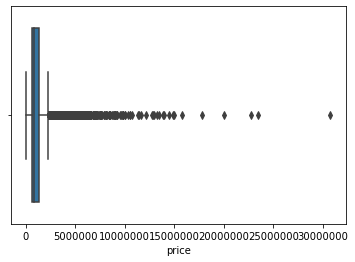

In [57]:
# Let's look at the price
sns.boxplot(clean_king['price']);
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

In [58]:
# Filtering out outliers of price in the data
clean_king = clean_king[(clean_king.price < clean_king.price.quantile(.995)) 
                        & (clean_king.price > clean_king.price.quantile(.005))]

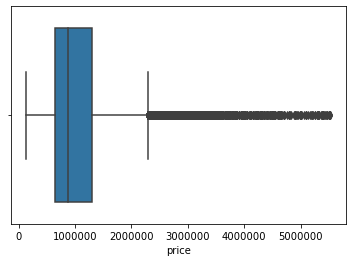

In [59]:
# Let's look at the price
sns.boxplot(clean_king['price']);
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

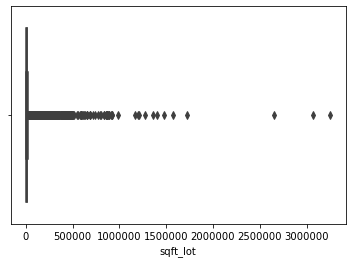

In [60]:
sns.boxplot(clean_king['sqft_lot']);
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

In [64]:
# Filtering out outliers of sqft_lot in the data
clean_king = clean_king[(clean_king.sqft_lot < clean_king.sqft_lot.quantile(.95)) 
                        & (clean_king.sqft_lot > clean_king.sqft_lot.quantile(.05))]

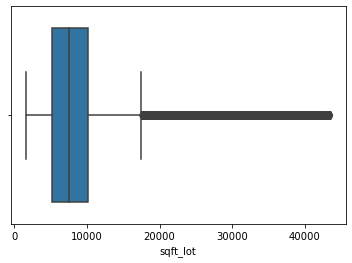

In [65]:
sns.boxplot(clean_king['sqft_lot']);

In [66]:
clean_king.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,month,age,renovated
count,2.576500e+04,2.576500e+04,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000
mean,4.646904e+09,1.081901e+06,3.483679,2.310149,2122.249525,9195.351135,1.463264,1816.319387,483.373608,338.319736,202.146517,1971.265011,96.189637,47.540607,-122.215484,6.866136,51.734989,0.048127
std,2.871815e+09,6.861843e+05,0.962590,0.876873,900.881148,6788.468280,0.503384,825.165909,576.880798,270.207700,225.066250,31.282067,427.807823,0.146660,0.139363,3.089435,31.282067,0.214039
min,1.000055e+06,1.279140e+05,0.000000,0.000000,100.000000,1578.000000,1.000000,100.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,1.000000,1.000000,0.000000
25%,2.201500e+09,6.400000e+05,3.000000,2.000000,1470.000000,5200.000000,1.000000,1200.000000,0.000000,0.000000,40.000000,1950.000000,0.000000,47.423300,-122.325525,4.000000,26.000000,0.000000
50%,4.022901e+09,8.700000e+05,3.000000,2.500000,1980.000000,7550.000000,1.000000,1600.000000,0.000000,410.000000,140.000000,1972.000000,0.000000,47.552355,-122.231670,7.000000,51.000000,0.000000
75%,7.338402e+09,1.318000e+06,4.000000,3.000000,2630.000000,10121.000000,2.000000,2290.000000,980.000000,510.000000,298.000000,1997.000000,0.000000,47.671770,-122.135670,9.000000,73.000000,0.000000
max,9.904000e+09,5.525000e+06,11.000000,9.500000,9627.000000,43547.000000,4.000000,8882.000000,3960.000000,3050.000000,2880.000000,2022.000000,2022.000000,47.876700,-121.298765,12.000000,123.000000,1.000000


## Data Visualization

I want to gain a better understanding of some of the trends within certain parts of our data. My first question surrounds how many houses in the area are available to renovate. This will allow 

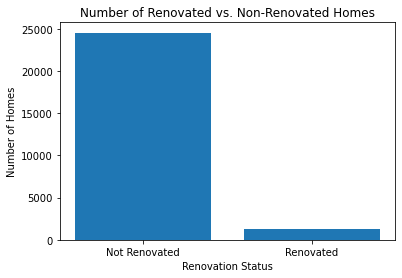

In [67]:
# Count the number of renovated and non-renovated homes in clean_king
renovated_counts = clean_king['renovated'].value_counts()

# Create a bar chart showing the number of renovated vs. non-renovated homes
fig, ax = plt.subplots()
ax.bar(['Not Renovated', 'Renovated'], renovated_counts.values)
ax.set_xlabel('Renovation Status')
ax.set_ylabel('Number of Homes')
ax.set_title('Number of Renovated vs. Non-Renovated Homes')
plt.show()

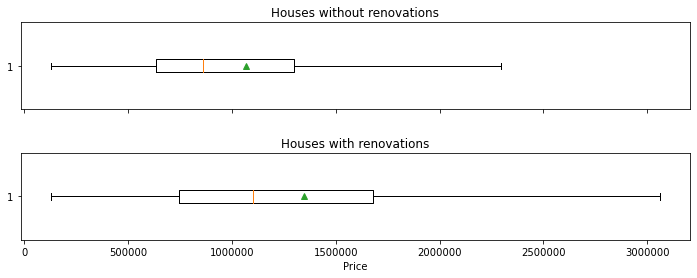

House prices without renovations median: $ 860000
House prices with renovations median: $ 1100000
Percentage increase in price with renovations 27 %


In [68]:
#Create two sets of data, one for transactions without renovations (woreno) and one with renovations(reno).
prices_woreno = clean_king[clean_king['renovated']== 0].price
prices_reno = clean_king[clean_king['renovated']!= 0].price
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,4), sharex=True)

#Create boxplot without outliers for better visualization.
ax1.boxplot(prices_woreno, vert=False, showfliers=False, showmeans=True)
ax2.boxplot(prices_reno,vert=False, showfliers=False, showmeans=True)
ax1.set_title('Houses without renovations')
ax2.set_title('Houses with renovations')
plt.xlabel('Price')
plt.subplots_adjust(hspace=0.50)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.show()
print('House prices without renovations median: $',int(prices_woreno.median()))
print('House prices with renovations median: $',int(prices_reno.median()))
print('Percentage increase in price with renovations',
      int(float((prices_reno.median()-prices_woreno.median())/prices_woreno.median())*100),'%')

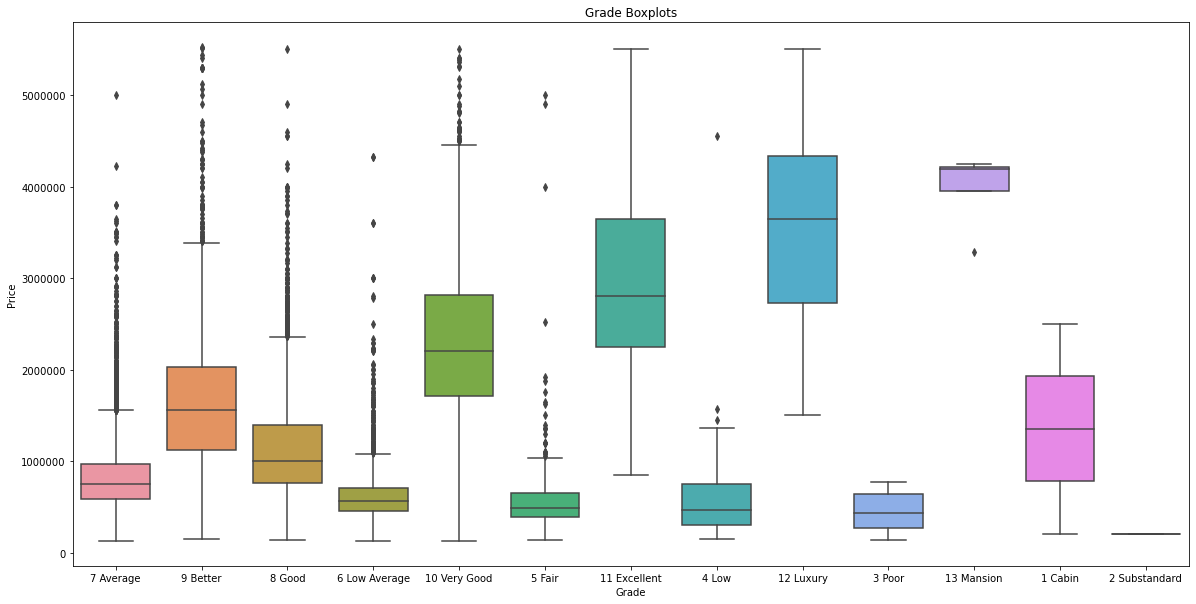

In [69]:
#Create a subset of the database with the variables needed for the analysis.
plt.figure(figsize=(20, 10))
sns.boxplot(x='grade', y='price', data=clean_king)
plt.title('Grade Boxplots')
plt.ylabel('Price')
plt.xlabel('Grade')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.show()

It looks like there is a slight linear relationship between grade and price. 

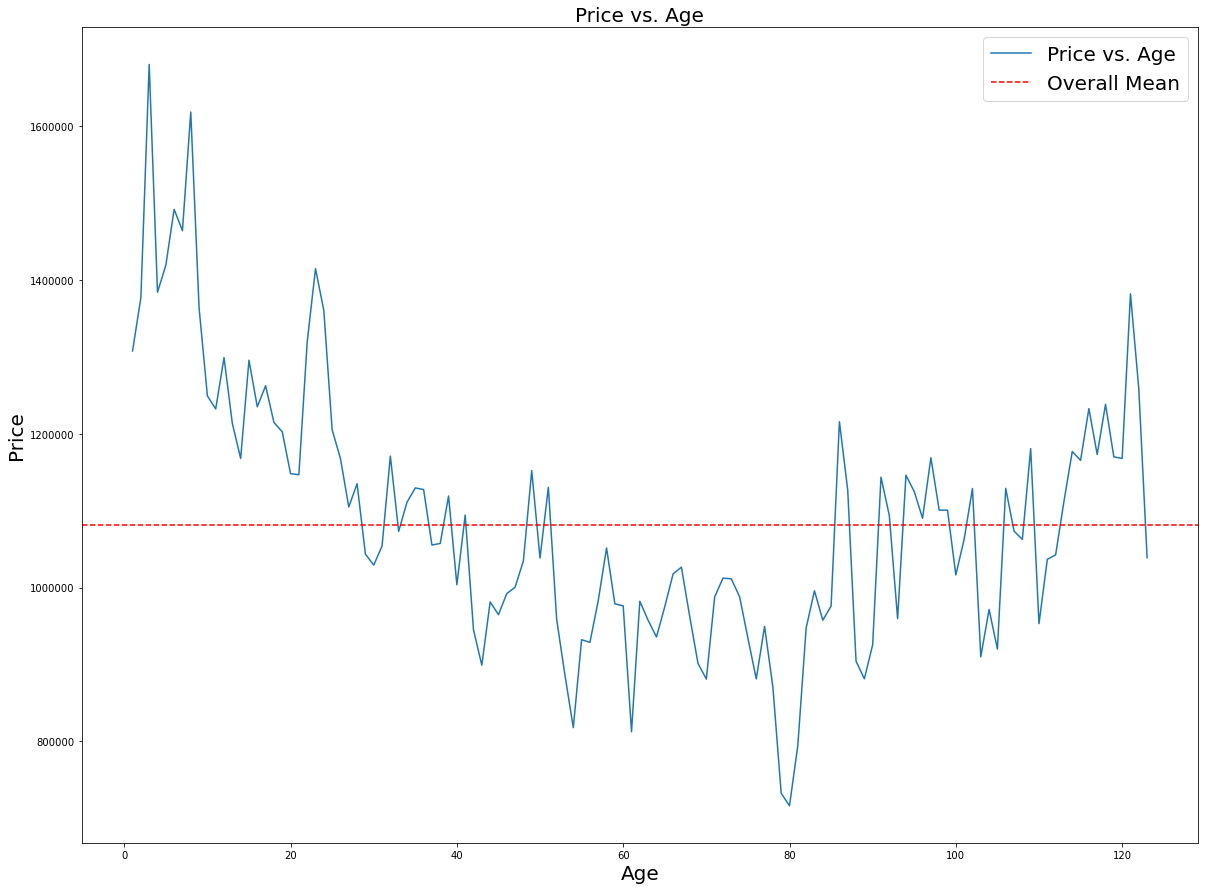

In [70]:
#Groups by sqft_living and calculate the mean price
age_price = clean_king.groupby('age')['price'].mean()

#Creates a line plot
fig = plt.figure(figsize=(20,15))
plt.plot(age_price.index, age_price.values, label='Price vs. Age')
plt.axhline(y=clean_king['price'].mean(), color='r', linestyle='--', label='Overall Mean')

plt.title('Price vs. Age', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.legend(fontsize=20)

plt.show()

We can see that the age of the home has a slightly negative sloped meaning as our homes get older our pricing range may decrease.

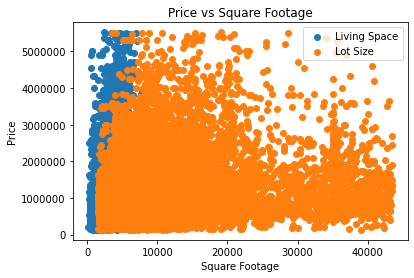

In [71]:
# plot the scatter plot
plt.scatter(clean_king['sqft_living'], clean_king['price'], label='Living Space')
plt.scatter(clean_king['sqft_lot'], clean_king['price'], label='Lot Size')

# set the x and y axis labels
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

# set the plot title
plt.title('Price vs Square Footage')

# add a legend
plt.legend()

# display the plot
plt.show()

I wanted to see how the living space of the home compared to the size of the lot, or land, on which the house is built to understand how each is influencing the price. Sqft_lot has some outliers that we will want to normalize in order to get a better understanding. 

In [72]:
clean_king['sqft_lot'].median()

7550.0

In [73]:
clean_king['sqft_living'].median()

1980.0

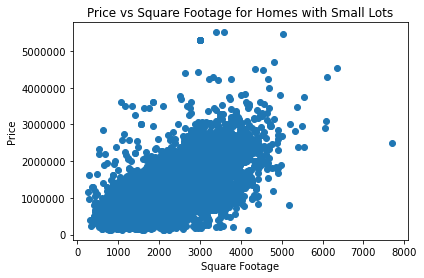

In [74]:
# filter for homes with a sqft_lot of 8000 or less
small_lot = clean_king[clean_king['sqft_lot'] <= 7551]

# plot the scatter plot
plt.scatter(small_lot['sqft_living'], small_lot['price'])

# set the x and y axis labels
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

# set the plot title
plt.title('Price vs Square Footage for Homes with Small Lots')

# display the plot
plt.show()

In [75]:
small_lot.sqft_lot.describe()

count    12888.000000
mean      5192.517924
std       1545.679645
min       1578.000000
25%       4025.000000
50%       5200.000000
75%       6477.500000
max       7551.000000
Name: sqft_lot, dtype: float64

## Correlations and Multicollinearity

I want to find the variables with the highest correlation to price. I also want to make sure to eliminate any variables higher than 0.80 to lower the risk of multicollinearity. Since I added numerical values to our explanatory columns, we will also be able to measure their correlation. The matrix below provides a visual for how closely correlated each variable is to one another. 

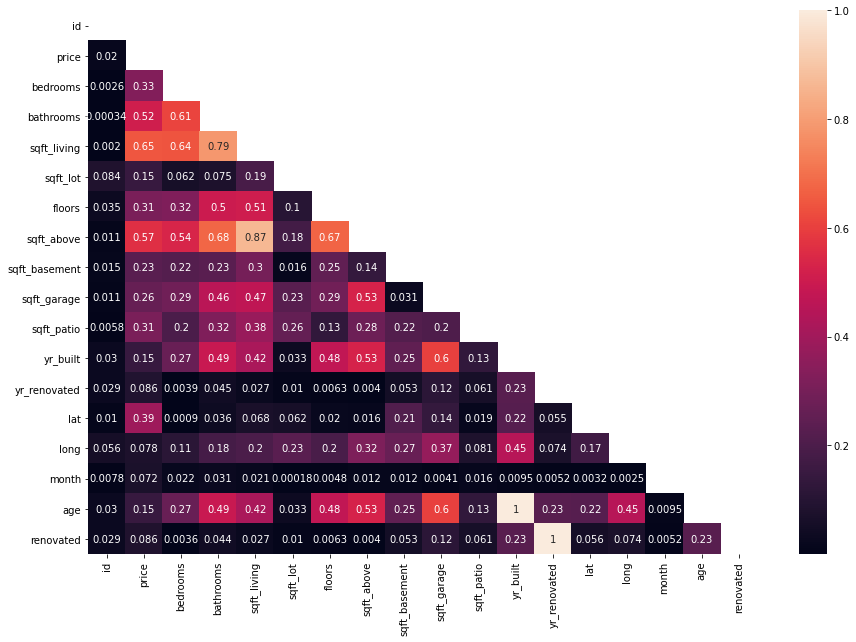

In [76]:
# A look at the Pearson correlation coefficients between variables by using a heatmap
corr = small_lot.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(clean_king.corr().abs(), annot=True, mask=mask);

I want to remove sqft_above as it has a strong correlation to sqft_living, which is my preferred variable. Latitude and Longitude have a semi-strong correlation, but that's to be expected. I'm also going to remove yr_built and yr_renovated as they conflict with age and renovated. The ID column is also useless for our model, so I'll drop this column as well. 

In [77]:
#Dropping columns that are unnecessary or contribute to multicolinearity
clean_df = small_lot.drop(columns=['id','sqft_above','yr_renovated','yr_built'])
clean_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_basement,sqft_garage,sqft_patio,address,lat,long,month,age,renovated
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,5,54,0
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,12,73,0
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,9,67,0
5,2021-07-20,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,...,PUBLIC,0,300,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,7,75,0
7,2022-04-28,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,...,PUBLIC,0,440,206,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625,4,4,0


### Splitting Data

In [78]:
df_cat = small_lot[['month','grade', 'waterfront', 'condition','greenbelt', 'nuisance', 'view', 'heat_source', 'sewer_system','renovated']].copy()
df_num = small_lot[['price','bedrooms', 'bathrooms','sqft_living','sqft_lot', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'age', 'lat', 'long']].copy()

In [79]:
df_cat.month.unique() #checking to see the range of values in our data

array([ 5, 12,  9,  7,  4,  6, 11,  8,  3, 10,  1,  2], dtype=int64)

In [80]:
df_cat.month = df_cat.month.replace(12, 0) #replacing 12's with 0's so that it will be easier to bin the data into seasons
#this way, if December is coded as "0", I can say months 0-2 represent winter, 3-5 represent spring, etc.

In [81]:
df_cat.month.unique() #making sure I was sucessful in replacing the 12's with 0's

array([ 5,  0,  9,  7,  4,  6, 11,  8,  3, 10,  1,  2], dtype=int64)

In [82]:
#creating bins values to be organized by 
bins = [0, 3, 6, 9, 11]
# showing pandas which column we want to be binned, how many bins (defaults to one less than the # of bins we created, setting labels)
bins_date = pd.cut(df_cat['month'], bins, include_lowest = True, labels = ["winter", "spring", "summer", "fall"])
bins_date = bins_date.cat.as_unordered() 

<AxesSubplot:>

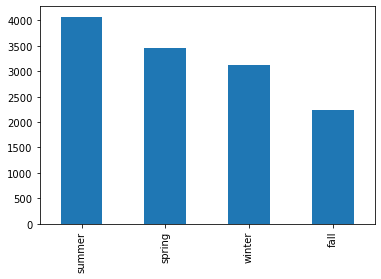

In [83]:
bins_date.value_counts().plot(kind='bar') #plotting a bar graph to preview these results

In [84]:
df_cat.info() #let's make sure everything is encoded properly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 30153
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         12888 non-null  int64 
 1   grade         12888 non-null  object
 2   waterfront    12888 non-null  object
 3   condition     12888 non-null  object
 4   greenbelt     12888 non-null  object
 5   nuisance      12888 non-null  object
 6   view          12888 non-null  object
 7   heat_source   12888 non-null  object
 8   sewer_system  12888 non-null  object
 9   renovated     12888 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [85]:
df_cat = df_cat.drop(["month"], axis=1) #removing our pre-binned columns
df_cat = pd.concat([df_cat, bins_date], axis=1) #and replacing them with our binned columns

In [86]:
df_cat.info() #Let's make sure our binned columns are encoded as categories

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 30153
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   grade         12888 non-null  object  
 1   waterfront    12888 non-null  object  
 2   condition     12888 non-null  object  
 3   greenbelt     12888 non-null  object  
 4   nuisance      12888 non-null  object  
 5   view          12888 non-null  object  
 6   heat_source   12888 non-null  object  
 7   sewer_system  12888 non-null  object  
 8   renovated     12888 non-null  int64   
 9   month         12888 non-null  category
dtypes: category(1), int64(1), object(8)
memory usage: 1019.6+ KB


In [87]:
df_cat['renovated'] = df_cat['renovated'].astype("str")

In [88]:
df_cat.info() #Let's make sure our binned columns are encoded as categories

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 30153
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   grade         12888 non-null  object  
 1   waterfront    12888 non-null  object  
 2   condition     12888 non-null  object  
 3   greenbelt     12888 non-null  object  
 4   nuisance      12888 non-null  object  
 5   view          12888 non-null  object  
 6   heat_source   12888 non-null  object  
 7   sewer_system  12888 non-null  object  
 8   renovated     12888 non-null  object  
 9   month         12888 non-null  category
dtypes: category(1), object(9)
memory usage: 1019.6+ KB


## One-hot encoded

In [89]:
df_cat = pd.get_dummies(df_cat) #one-hot encoding our data
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 30153
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   grade_10 Very Good               12888 non-null  uint8
 1   grade_11 Excellent               12888 non-null  uint8
 2   grade_12 Luxury                  12888 non-null  uint8
 3   grade_3 Poor                     12888 non-null  uint8
 4   grade_4 Low                      12888 non-null  uint8
 5   grade_5 Fair                     12888 non-null  uint8
 6   grade_6 Low Average              12888 non-null  uint8
 7   grade_7 Average                  12888 non-null  uint8
 8   grade_8 Good                     12888 non-null  uint8
 9   grade_9 Better                   12888 non-null  uint8
 10  waterfront_NO                    12888 non-null  uint8
 11  waterfront_YES                   12888 non-null  uint8
 12  condition_Average                12888 non-nul

# Modeling

## Mean Normalization of Numerical Data

We may want to view how data changes using StandardScaler and then MinMaxScaler to evaluate the effects of data normalization on the data.

StandardScaler scales the data so that it has zero mean and unit variance. This means that after scaling, the data has a mean of 0 and a standard deviation of 1. On the other hand, MinMaxScaler scales the data so that it falls within a specified range, usually between 0 and 1.

By comparing the results of these two normalization techniques, I can evaluate which technique is better suited for the specific data. StandardScaler is better for normally distributed data, while MinMaxScaler is more suitable for data that has a bounded range.

Additionally, visualizing how the data changes after applying each scaler can provide insights into the data's distribution, outliers, and other characteristics that may affect model performance. For example, if the data has a large number of outliers or a skewed distribution, normalization techniques such as MinMaxScaler may not be appropriate, as they can further amplify the effects of outliers or distort the data distribution. In such cases, StandardScaler may be a more appropriate normalization technique.

Overall, viewing how the data changes using different normalization techniques can help me identify potential issues with the data and choose the appropriate normalization technique for our machine learning model.

In [90]:
scaler = StandardScaler() #this is how we will reference StandardScaler
#creating a new dataframe of scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns) #fitting and transforming our data
#as well as making sure our column names carry over, otherwise our function will just return a numpy array

df_scaled.head() #let's check it out!

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,age,lat,long
0,-0.629950,0.597748,-1.498950,-1.039933,1.260001,-1.112366,-0.909332,-1.168592,-0.689566,0.035159,-0.665520,0.357838
1,-0.180449,1.605963,0.263362,0.929104,0.977266,-1.112366,2.139681,-1.168592,0.479323,0.537349,1.143485,-0.849960
2,-1.297780,2.614178,-0.324075,1.065326,0.623363,-1.112366,2.159101,-1.168592,-0.923344,0.378763,-0.375050,0.104579
3,-0.721685,-1.418683,-1.498950,-1.027549,0.320572,-1.112366,-0.909332,0.104262,-0.923344,0.590211,1.520038,-0.734905
4,-0.363919,-0.410468,0.263362,0.240560,-1.091160,0.843989,-0.909332,0.698261,0.280612,-1.286393,-1.271687,0.444703


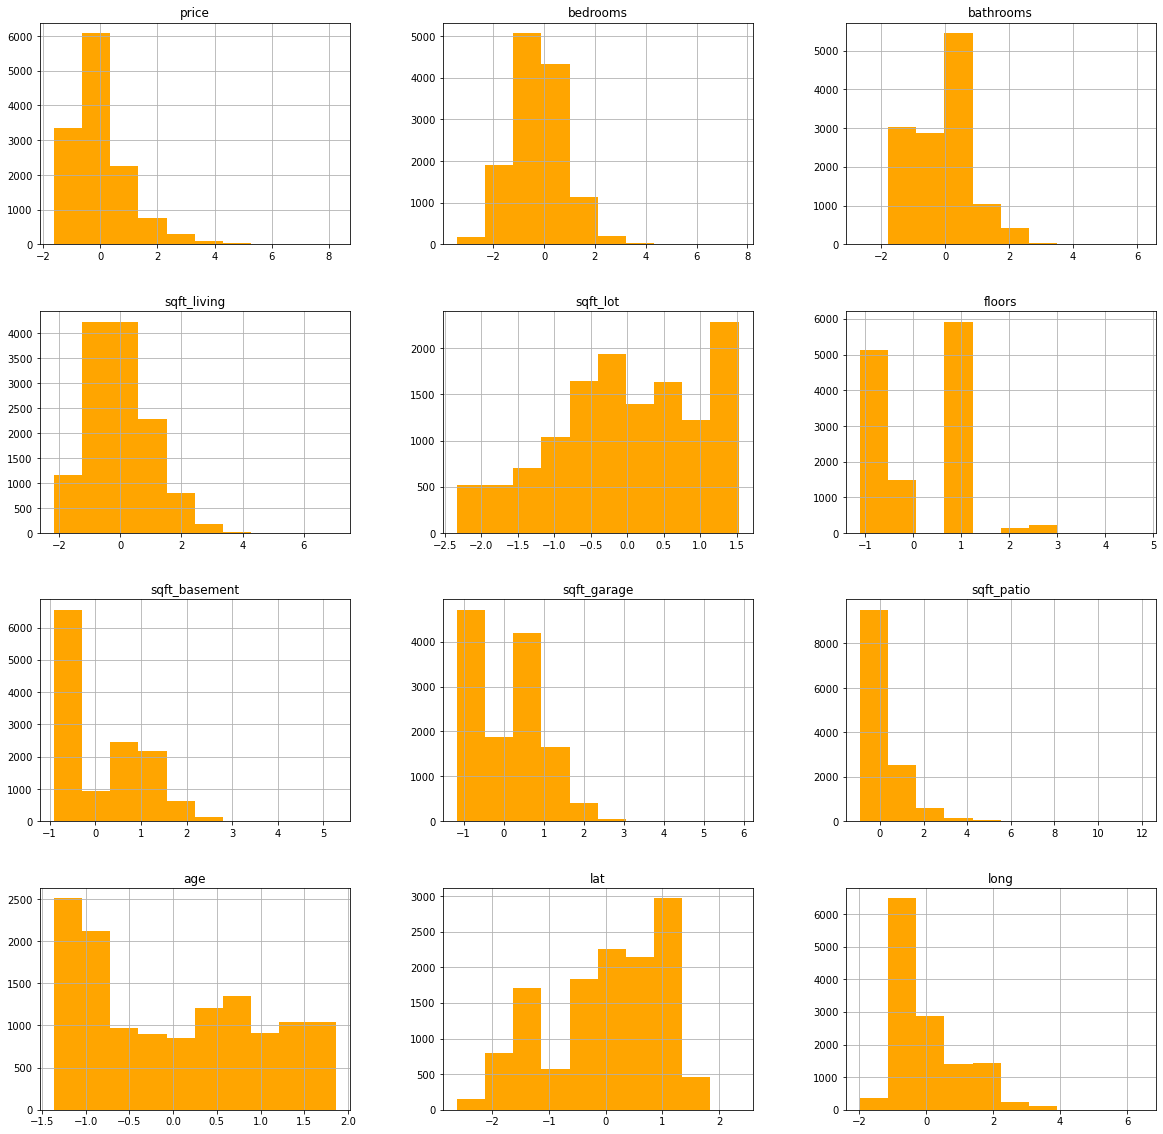

In [91]:
df_scaled.hist(figsize = (20,20), color = "orange", lw=0); #this function gives us histograms for each column

Most of our columns still have a right-skew with the exception of sqft_lot. Looking back at the original `king-raw` distributions not much has been changed in respect to distribution, so this may not be our best option for normalizing. 

## MIn-Max Normalization of Numerical Data

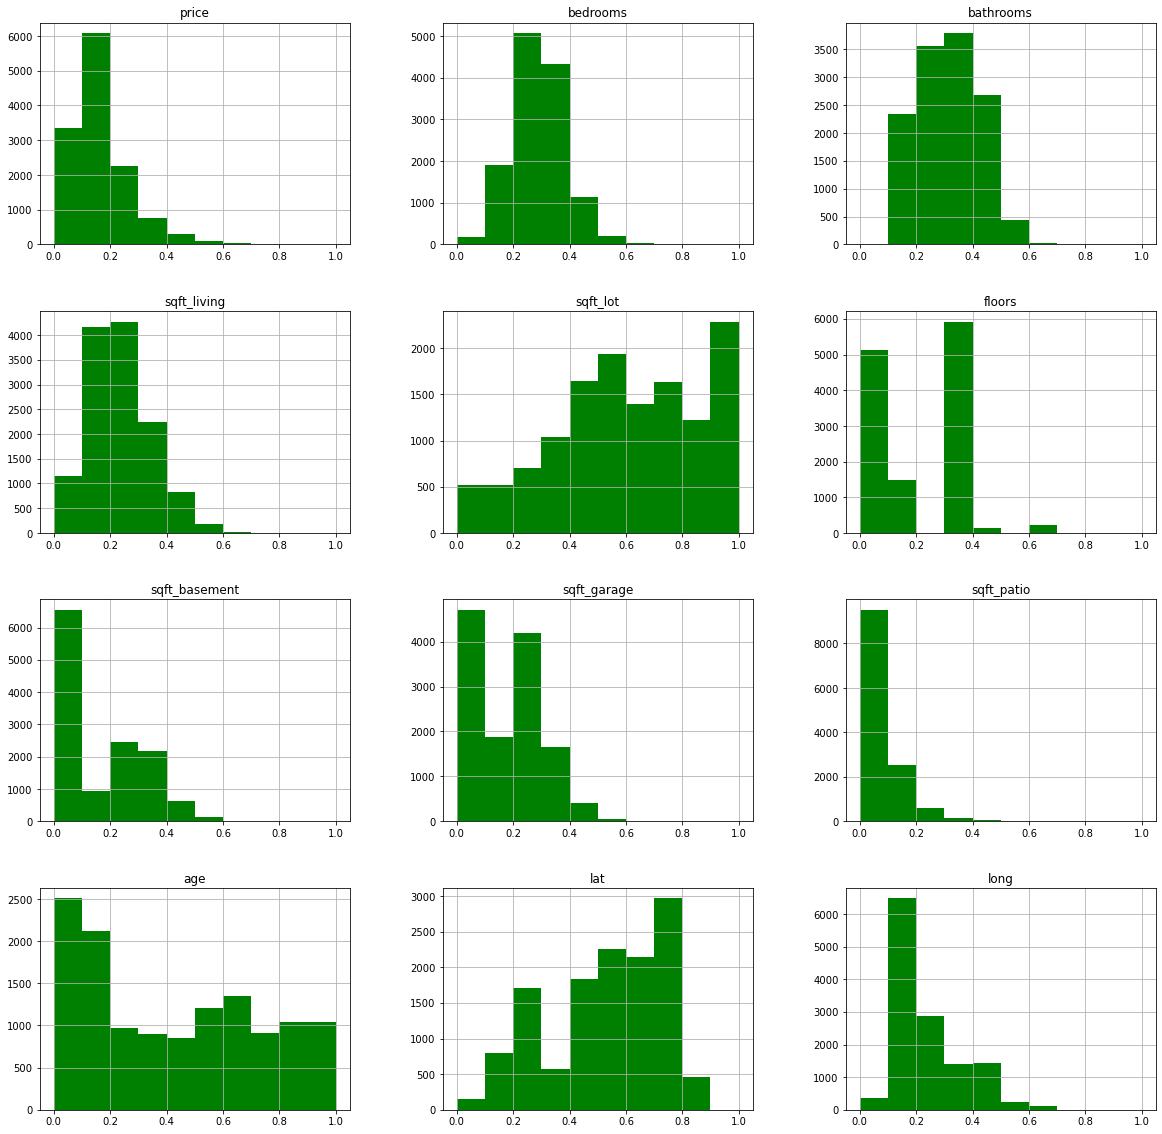

In [92]:
#let's just see how things change when we use a min-max scaler (normalization using y= (x-min)/(max-min))
from sklearn.preprocessing import MinMaxScaler #importing the MinMax Scaler
mmscaler = MinMaxScaler() #this is how we will reference said scaler
df_minmax = pd.DataFrame(mmscaler.fit_transform(df_num),columns = df_num.columns) 
df_minmax.hist(figsize = (20,20), color = "green"); #let's make a histogram to compare

I'm still not seeing much change in the distribution, so I'm going to move forward changing only the price using log transformation. I tried the log transformation for every numerical value, but the were too extreme. 

In [93]:
df_price_log= pd.DataFrame([]) #creating yet another dataframe to hold my numerical data
df_price_log = df_num

df_price_log['price']= np.log(df_price_log['price']) #performing a log transformation on price


df_price_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,age,lat,long
0,13.422468,4,1.0,1180,7140,1.0,0,0,40,54,47.461975,-122.190520
1,13.732129,5,2.5,2770,6703,1.0,1570,0,240,73,47.711525,-122.355910
2,12.647548,6,2.0,2880,6156,1.0,1580,0,0,67,47.502045,-122.225200
5,13.345507,2,1.0,1190,5688,1.0,0,300,0,75,47.763470,-122.340155
7,13.617060,3,2.5,2214,3506,2.0,0,440,206,4,47.378355,-122.178625


<AxesSubplot:>

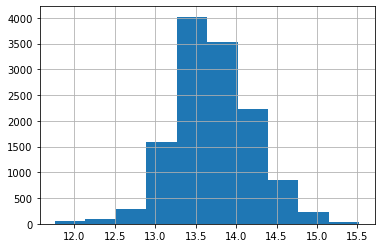

In [94]:
df_price_log['price'].hist() #let's just see how the shape of price changed

This is the normal distribution I want.

## Joint Plots

Joint plots combine scatterplots and KDE plots to show the relationship between two variables. The scatterplot displays the joint distribution of the two variables, while the KDE plots display the marginal distributions of each variable. Joint plots can be used to visualize the correlation between two variables and to identify any patterns or trends in the data.

These visualization tools are especially useful when exploring potential relationships between variables in a regression analysis. By examining the joint distribution of the independent and dependent variables, we can get a sense of the nature and strength of the relationship between them, and identify any potential outliers or unusual patterns that may impact our regression results.

An ideal joint plot for a good regression should clearly show a strong linear relationship between the variables, with a narrow spread of data points and no significant outliers. 

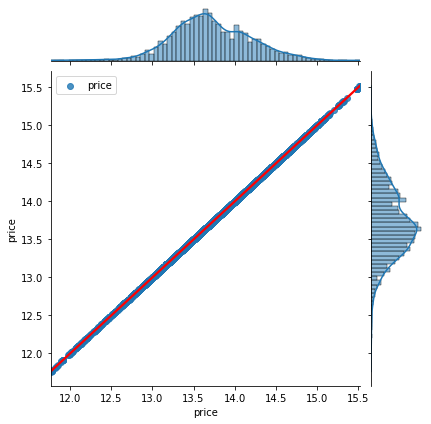

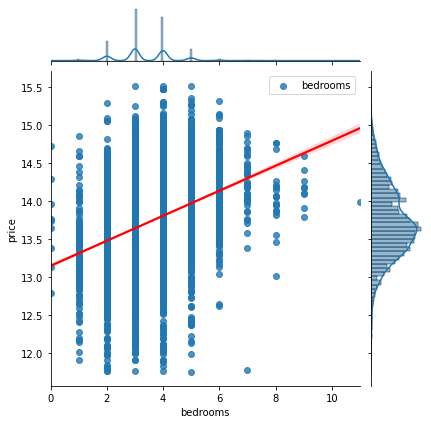

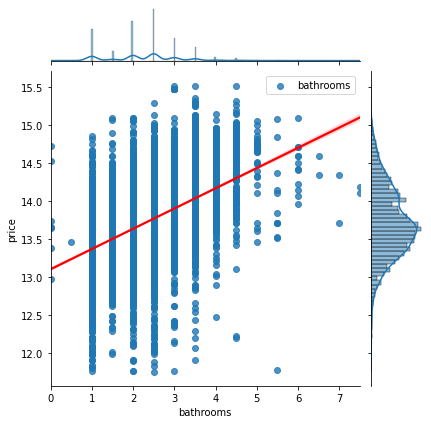

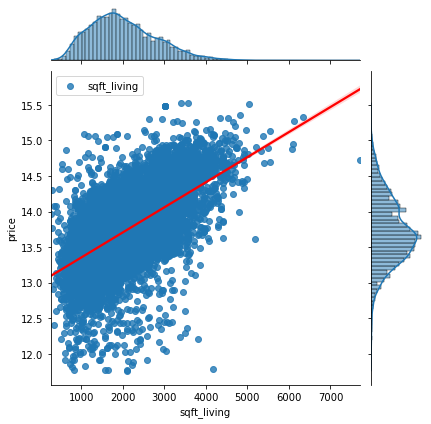

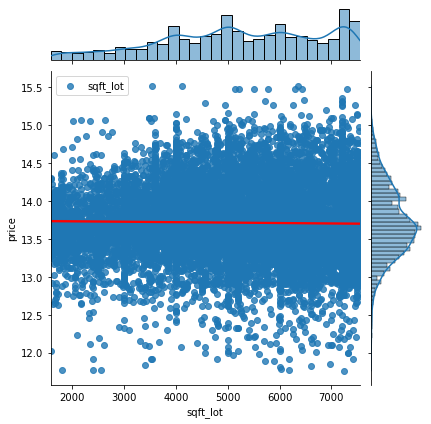

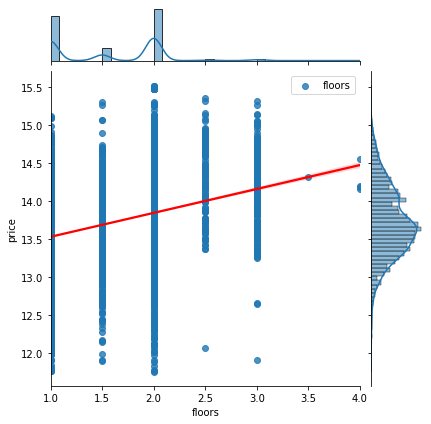

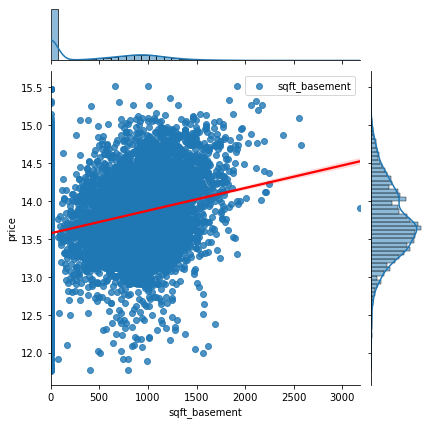

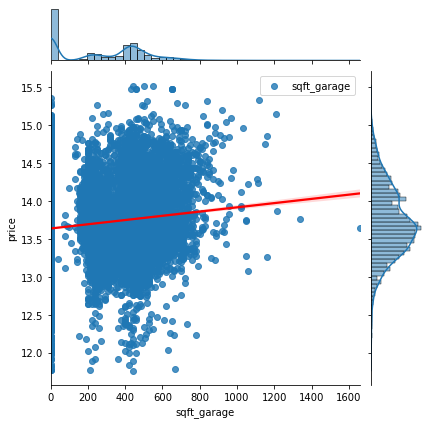

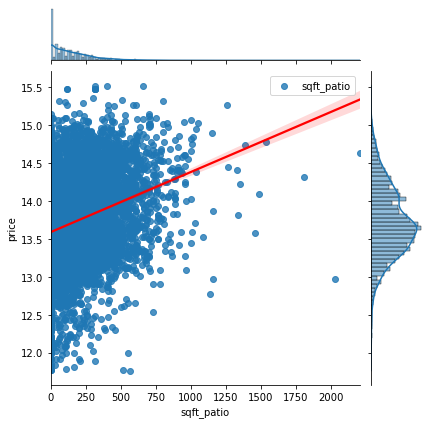

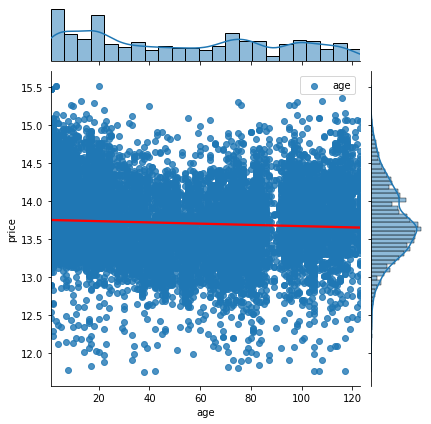

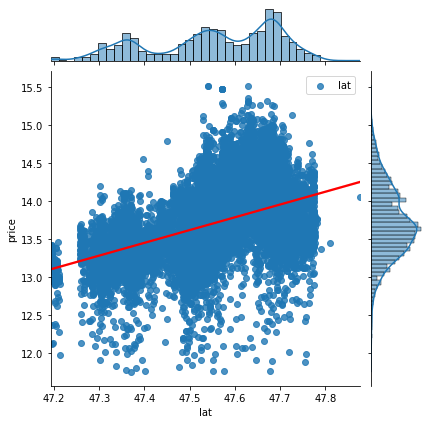

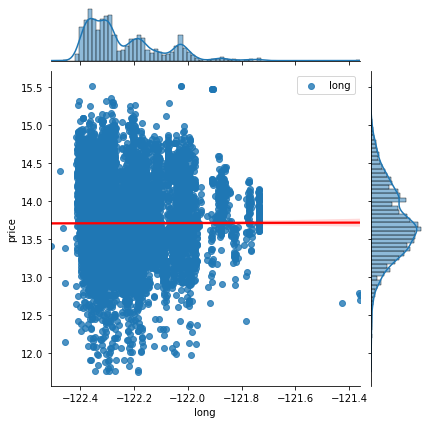

In [97]:
#once again just iterating through our list of columns so that we get each separate plot
for column in headers:
    sns.jointplot(x=column, y="price", #creating our joint plot as well as setting our columns to be predictors and price to be our target
                  data=df_price_log, #we want the jointplots to be created using our df_mean_norm dataset
                  kind='reg', 
                  label=column, 
                  joint_kws={'line_kws':{'color':'red'}}) #stylistic choices

    plt.legend() #including a legend for our plots
    plt.show()

### Takeaways
- The strongest linear relationships are `bedrooms`,'`bathrooms`,`sqft_living`,`sqft_patio`.
- There is slight linearity with `sqft_garage`, `lat`
- I'm not seeing a linear relationship between any of the other features. 
- I'm still seeing a high spread for all of the features
- As we can see when `price` is compared to `price` the scatterplot is close together while have a linear relationship. This is not something we see in our other graphs

I'm going to combine our numerical and categorical coded data. 

In [135]:
#I think we're ready to go ahead and add our categorical data to our numerical data
df_combo = pd.concat([df_price_log, df_cat], axis=1) #combining our cat data and num data
df_combo.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,age,...,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,renovated_0,renovated_1,month_winter,month_spring,month_summer,month_fall
0,13.422468,4,1.0,1180,7140,1.0,0,0,40,54,...,0,0,1,0,1,0,0,1,0,0
1,13.732129,5,2.5,2770,6703,1.0,1570,0,240,73,...,0,0,1,0,1,0,1,0,0,0
2,12.647548,6,2.0,2880,6156,1.0,1580,0,0,67,...,0,0,1,0,1,0,0,0,1,0
5,13.345507,2,1.0,1190,5688,1.0,0,300,0,75,...,0,0,1,0,1,0,0,0,1,0
7,13.617060,3,2.5,2214,3506,2.0,0,440,206,4,...,0,0,1,0,1,0,0,1,0,0


I want to make sure our categorical data is a category or object datatype for the regression to work. The loop below only applies to the columns after 12 since we've combined the numerical. 

In [136]:
#it looks like our categorical variables were converted to uint8, let's make sure they are categories!
for cat_names in df_combo.iloc[:,12:].columns:
         df_combo[cat_names] = df_combo[cat_names].astype('category')

In [137]:
df_combo.dtypes #let's make sure everything is still correctly encoded

price                               float64
bedrooms                              int64
bathrooms                           float64
sqft_living                           int64
sqft_lot                              int64
floors                              float64
sqft_basement                         int64
sqft_garage                           int64
sqft_patio                            int64
age                                   int64
lat                                 float64
long                                float64
grade_10 Very Good                 category
grade_11 Excellent                 category
grade_12 Luxury                    category
grade_3 Poor                       category
grade_4 Low                        category
grade_5 Fair                       category
grade_6 Low Average                category
grade_7 Average                    category
grade_8 Good                       category
grade_9 Better                     category
waterfront_NO                   

## OLS Regression-Numerical Values

To start our modeling I'm using a for loop created by Emily Pfeifer (https://github.com/emilypfeifer/kingcounty/blob/master/student.ipynb) to take each variable and produce an OLS analysis against price. This code is performing a simple linear regression on `df_combo`. It selects columns 1-12 (excluding the first column which is assumed to be the index column) as independent variables to use in the regression.

For each independent variable, the code generates a formula for a linear regression model and fits the model using ordinary least squares (OLS) method from the statsmodels module. It then stores the results of the regression analysis such as r-squared, intercept, slope, and p-value in a results array.

The code also creates a new dataframe `X_new` with the minimum and maximum values of the independent variable used in the regression. Using this, it predicts the corresponding minimum and maximum values of the dependent variable (`price`) and stores these in a preds array.

Finally, the code prints the regression results and the summary statistics for each regression. The summary statistics provide important information about the quality of the regression such as the p-value, the R-squared value, the coefficient of determination, and the standard error of the estimate, which can be used to evaluate the accuracy of the regression model.

I prefer this method as it gives an organized list of how each numerical feature compares to `price`. This allows me to easily eliminate features to make our model better.

In [138]:
col_names = df_combo.describe().columns[1:12]  # select columns 1-13

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]  # creating an array to easily see the results we care about most
for idx, val in enumerate(col_names):  # iterating through list of column names while also numbering them (that's the enumerate function)
    print("price~" + val)  # labeling our results with their respective values
    f = 'price~' + val  # building the formula
    model = smf.ols(formula=f, data=df_combo).fit()  # fitting the line
    X_new = pd.DataFrame({val: [df_combo[val].min(), df_combo[val].max()]})  # making a dataframe with the min and max values of our column
    preds = model.predict(X_new)  # creating as well as storing our predictions
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])  # adding each value's data to our array
    print(results[idx+1])  # viewing our results
    print(model.summary())  # shows the regression diagnostics summary
    # while we are extracting a few elements of the table to view them more clearly, the model summary can provide a lot of useful information

price~bedrooms
['bedrooms', 0.1131835003493622, 13.153273490313053, 0.1645350198812729, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1645.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:10:24   Log-Likelihood:                -8189.5
No. Observations:               12888   AIC:                         1.638e+04
Df Residuals:                   12886   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [139]:
pd.DataFrame(results) #viewing our data in a neat little table

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.113184,13.1533,0.164535,0
2,bathrooms,0.218334,13.1078,0.266296,0
3,sqft_living,0.344682,13.0015,0.000352679,0
4,sqft_lot,0.000323202,13.7432,-5.64219e-06,0.0412604
5,floors,0.109892,13.2204,0.31459,0
6,sqft_basement,0.100416,13.5741,0.000298521,1.72568e-298
7,sqft_garage,0.0183735,13.637,0.000278976,6.65166e-54
8,sqft_patio,0.0779857,13.5888,0.000791707,1.60358e-229
9,age,0.0041049,13.7571,-0.000821447,3.33114e-13


In [140]:
formula = 'price ~ ' + ' + '.join(col_names) #defining our formula
mod = smf.ols(formula=formula, data = df_combo) #completing an OLS regression on our model overall
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1814.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:10:26   Log-Likelihood:                -2933.2
No. Observations:               12888   AIC:                             5890.
Df Residuals:                   12876   BIC:                             5980.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -48.1755      3.109    -15.496      0.000     -54.269     -42.082
bedrooms         -0.0332      0.004     -8.804      0.000      -0.041      -0.026
bathrooms         0.0467      0.006      8.393      0.000       0.036       0.058
sqft_living       0.0003   6.75e-06     45.191      0.000       0.000       0.000
sqft_lot       3.236e-06   2.09e-06      1.550      0.121   -8.57e-07    7.33e-06
floors            0.0994      0.008     11.788      0.000       0.083       0.116
sqft_basement   3.65e-05   7.53e-06      4.848      0.000    2.17e-05    5.13e-05
sqft_garage       0.0001   1.72e-05      5.864      0.000    6.71e-05       0.000
sqft_patio        0.0002   1.68e-05     12.558      0.000       0.000       0.000
age               0.0016      0.000     12.986      0.000       0.001       0.002
lat               1.6744      0.022     76.530      0.000       1.632       1.717
long              0.1528      0.025      6.083      0.000       0.104       0.202
==============================================================================
Omnibus:                     2779.314   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18955.865
Skew:                          -0.863   Prob(JB):                         0.00
Kurtosis:                       8.685   Cond. No.                     6.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Takeaways

The model performed pretty well overal with 60.7% of the variance between price and the features being accounted for in the regression. Ideally we want to get as close to 1 or 100% as possible. 

Our Kurtosis is high suggesting we are not abiding by the normality assumption. We're also seeing a high condition number, which can sometimes be drawn back to the constant value. 

`long` is the only feature with a p-value higher than 0.05. This means we cannot reject the null hypothesis of the independent and dependent variables are significantly related. `sqft_lot` is pretty close to 0.05.

`sqft_living` is still our highest correlation to `price`

## OLS Regression- Categorical Values

I'm going to be using a similar strategy as we did for the numerical OLS. This follows a similar path used by Emily Pfeifer with changes made for my data. 

In [141]:
#I need to see where the columns are to know where to begin the categorical OLS
index = df_combo.columns #assigning the dataframe to index
for i, column in enumerate(index): #returns a sequence of pairs with the location of the item in the index
    print(f"{column}: {i}")

price: 0
bedrooms: 1
bathrooms: 2
sqft_living: 3
sqft_lot: 4
floors: 5
sqft_basement: 6
sqft_garage: 7
sqft_patio: 8
age: 9
lat: 10
long: 11
grade_10 Very Good: 12
grade_11 Excellent: 13
grade_12 Luxury: 14
grade_3 Poor: 15
grade_4 Low: 16
grade_5 Fair: 17
grade_6 Low Average: 18
grade_7 Average: 19
grade_8 Good: 20
grade_9 Better: 21
waterfront_NO: 22
waterfront_YES: 23
condition_Average: 24
condition_Fair: 25
condition_Good: 26
condition_Poor: 27
condition_Very Good: 28
greenbelt_NO: 29
greenbelt_YES: 30
nuisance_NO: 31
nuisance_YES: 32
view_AVERAGE: 33
view_EXCELLENT: 34
view_FAIR: 35
view_GOOD: 36
view_NONE: 37
heat_source_Electricity: 38
heat_source_Electricity/Solar: 39
heat_source_Gas: 40
heat_source_Gas/Solar: 41
heat_source_Oil: 42
heat_source_Oil/Solar: 43
heat_source_Other: 44
sewer_system_PRIVATE: 45
sewer_system_PRIVATE RESTRICTED: 46
sewer_system_PUBLIC: 47
sewer_system_PUBLIC RESTRICTED: 48
renovated_0: 49
renovated_1: 50
month_winter: 51
month_spring: 52
month_summer: 5

In [142]:
#Changes the names of a few columns so that it will process through the OLS regression loop
df_combo = df_combo.rename(columns={'heat_source_Electricity/Solar': 'heat_source_Electricity_solar',
                                    'heat_source_Gas/Solar': 'heat_source_Gas_solar',
                                    'heat_source_Oil/Solar': 'heat_source_Oil_solar',
                                   'sewer_system_PRIVATE RESTRICTED': 'sewer_system_PRIVATE_RESTRICTED',
                                    'sewer_system_PUBLIC RESTRICTED':'sewer_system_PUBLIC_RESTRICTED',
                                    'condition_Very Good':'condition_Very_Good',
                                   'grade_10 Very Good':'grade_10_Very_Good',
                                   'grade_11 Excellent':'grade_11_Excellent',
                                   'grade_12 Luxury':'grade_12_Luxury',
                                   'grade_3 Poor':'grade_3_Poor',
                                   'grade_4 Low':'grade_4_Low',
                                   'grade_5 Fair':'grade_5_Fair',
                                   'grade_6 Low Average':'grade_6_Low_Average',
                                   'grade_7 Average':'grade_7_Average',
                                   'grade_8 Good':'grade_8_Good',
                                   'grade_9 Better':'grade_9_Better'})

In [143]:
#matching the data with their respective columns
#we have to drop one column from each variable to prevent singularity
cols_grade = df_combo.columns[12:21]
cols_waterfront = df_combo.columns[22:23]
cols_condition = df_combo.columns[24:28]
cols_greenbelt = df_combo.columns[29:30]
cols_nuisance = df_combo.columns[31:32]
cols_view = df_combo.columns[33:37]
cols_heat = df_combo.columns[38:44]
cols_sewer = df_combo.columns[45:49]
cols_renovated = df_combo.columns[50:51]
cols_seasons = df_combo.columns[52:55]

In [144]:
#time for our OLS regression
cols = [cols_grade,cols_waterfront, cols_condition, cols_greenbelt, cols_seasons, cols_view, cols_heat, cols_sewer, cols_nuisance, cols_renovated] #creating a list to iterate through
for col in cols: #creating a for loop
    sum_cols = "+".join(col) #adding each variable to our formula
    form = "price ~" + sum_cols #creating our formula
    model = smf.ols(formula= form, data= df_combo).fit() #fitting our model
    print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     799.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:10:31   Log-Likelihood:                -6102.3
No. Observations:               12888   AIC:                         1.222e+04
Df Residuals:                   12878   BIC:                         1.230e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The only feature with a high r-squared is `grade`. I'll eliminate the rest for our final dataframe

In [145]:
#first I am creating a new dataframe called "df_final" that only has the columns that I want to keep.
#first dropping continuous variables
df_final = df_combo.drop(["sqft_garage","sqft_basement","long","sqft_patio","age","sqft_lot"], axis=1)

In [146]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 30153
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   price                            12888 non-null  float64 
 1   bedrooms                         12888 non-null  int64   
 2   bathrooms                        12888 non-null  float64 
 3   sqft_living                      12888 non-null  int64   
 4   floors                           12888 non-null  float64 
 5   lat                              12888 non-null  float64 
 6   grade_10_Very_Good               12888 non-null  category
 7   grade_11_Excellent               12888 non-null  category
 8   grade_12_Luxury                  12888 non-null  category
 9   grade_3_Poor                     12888 non-null  category
 10  grade_4_Low                      12888 non-null  category
 11  grade_5_Fair                     12888 non-null  category
 12  grad

# Model One: Numerical and Grade

In [147]:
df_final = df_final.drop(df_final.columns[16:55],axis=1) #dropping everything after grade

In [148]:
#checking to ensure our elimination worked
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 30153
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                12888 non-null  float64 
 1   bedrooms             12888 non-null  int64   
 2   bathrooms            12888 non-null  float64 
 3   sqft_living          12888 non-null  int64   
 4   floors               12888 non-null  float64 
 5   lat                  12888 non-null  float64 
 6   grade_10_Very_Good   12888 non-null  category
 7   grade_11_Excellent   12888 non-null  category
 8   grade_12_Luxury      12888 non-null  category
 9   grade_3_Poor         12888 non-null  category
 10  grade_4_Low          12888 non-null  category
 11  grade_5_Fair         12888 non-null  category
 12  grade_6_Low_Average  12888 non-null  category
 13  grade_7_Average      12888 non-null  category
 14  grade_8_Good         12888 non-null  category
 15  grade_9_Better     

In [149]:
# Define the independent variables (all columns except 'price')
X = df_final.drop('price', axis=1)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define the dependent variable ('price')
y = df_final['price']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1563.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:10:39   Log-Likelihood:                -2563.0
No. Observations:               12888   AIC:                             5156.
Df Residuals:                   12873   BIC:                             5268.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -59.7108    

The R-squared value of 0.630 indicates that approximately 63% of the variance in the dependent variable is explained by the independent variables in the model. The adjusted R-squared value is the same, which suggests that adding more independent variables to the model did not improve the model fit.

The F-statistic value of 1563 and its associated p-value of 0.00 indicate that the overall regression model is statistically significant, meaning that at least one of the independent variables is significantly associated with the dependent variable. The F-statistic is a measure of the overall fit of a linear regression model. It tests the null hypothesis that all of the regression coefficients (except for the intercept) are equal to zero. In other words, it tests whether there is any linear relationship between the dependent variable and the independent variables.

Looking at the coefficients, we can see that most of the independent variables have a significant effect on the dependent variable, as indicated by their respective t-statistics and associated p-values. `bedrooms` and `floors` have p-values over 0.05, which means we cannot reject the null hypothesis for both. The coefficients for some of the "grade" categories are negative, which suggests that a lower grade is associated with a lower house price.

The notes section at the end of the summary indicates that there might be issues of multicollinearity or a singular design matrix. Therefore, further analysis may be needed to investigate these potential issues before making any further conclusions or predictions based on this model.

**There are a few potential next steps to consider in order to improve the regression:**

-Feature Engineering: creating new features based on domain knowledge or intuition. For example, instead of using age, I could create a new feature that takes the difference between the year the house was sold and the year it was built. This may provide additional information for the model to learn from and improve performance.

-Outlier Detection: Check for outliers in the data that may be affecting the regression. 

-Model Selection: testing other regression models, such as Ridge or Lasso regression, to see if they perform better on this dataset.

-Cross-validation: Use cross-validation techniques to assess the performance of the model on different subsets of the data. This will help to ensure that the model is not overfitting to the training data.

-Multicollinearity: Check for multicollinearity among the features, which can lead to unstable coefficients and incorrect interpretation of the results. 

# Model Two: Limited Living, Lot Size, Location, and Grade

Based on the results, I'm going to drop both `floors` and `bedrooms` as we can assume sqft_living represents both of those items too. While I normally wouldn't 

In [151]:
df_final = df_final.drop('floors', axis=1)

In [152]:
df_final = df_final.drop('bedrooms', axis=1)

In [153]:
# Define the independent variables (all columns except 'price')
X = df_final.drop('price', axis=1)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define the dependent variable ('price')
y = df_final['price']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1823.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:10:52   Log-Likelihood:                -2565.1
No. Observations:               12888   AIC:                             5156.
Df Residuals:                   12875   BIC:                             5253.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -59.8936    

Not much changed, so eliminating those features as a means of lowering the multicolinearity did not have the effect we were hoping it would

# Model Three: Log Model

I'm going to define a function called log_transform that takes in a dataset `data`. The function applies a logarithmic transformation to a specific feature called `sqft_living`, which is specified in the `log_transform` list.

The function creates a copy of the original data using the `.copy()` method, and stores it as `log_data`. Then, a for loop is used to iterate over each column in the `log_transform` list. For each column, the logarithmic transformation is applied to all the values of the column using the NumPy function np.log(), and the transformed values are assigned to the corresponding column in the `log_data` dataset.

Finally, the function returns the transformed dataset `log_data`. This loop is used to address skewness in the data, which can help improve the performance of my model.

In [163]:
# Log Transform
def log_transform(data):
    
    log_transform = ['sqft_living']
    log_data = data.copy()

    for col in log_transform:
        log_data[col] = np.log(log_data[col])
        
    return log_data

In [164]:
df_final_log = log_transform(df_final)

In [165]:
# Define the independent variables (all columns except 'price')
X = df_final_log.drop('price', axis=1)

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define the dependent variable ('price')
y = df_final_log['price']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1787.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:19:04   Log-Likelihood:                -2646.4
No. Observations:               12888   AIC:                             5319.
Df Residuals:                   12875   BIC:                             5416.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -62.9044    

Again, we're not seeing a lot of improvement, so log transforming `sqft_living`didn't improve the performance of the model

## Error Checking

In [166]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_final_log.drop('price', axis=1), df_final_log['price'], test_size=0.2, random_state=42)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Get the predicted values on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.08765721599447225
Root Mean Squared Error: 0.2960696134264242


The mean squared error (MSE) value of 0.0877 suggests that on average, the model's predicted housing prices deviate from the true housing prices by a squared value of 0.0877. This value is quite low, indicating that the model's predictions are generally close to the true values.

The root mean squared error (RMSE) value of 0.2961 is the square root of the MSE value and is on the same scale as the target variable (price). This means that the model's predicted housing prices deviate from the true values by an average value of 0.2961, which is relatively low compared to the range of the target variable. Therefore, the model's performance in predicting housing prices can be considered good.

# Model Four: Recursive Model

## Recursive Regression

Next I'm going to define a `recursive_regression` function that takes in the training and testing sets, as well as the desired number of features to select. The function then iteratively trains linear regression models on the training set, selects the feature with the highest absolute coefficient value, removes it from the feature set, and evaluates the performance on the testing set using the R-squared score. The function returns a list of the selected features.

In [167]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final_log.drop('price', axis=1), df_final_log['price'], test_size=0.3, random_state=42)

# Define a recursive regression function
def recursive_regression(X_train, y_train, X_test, y_test, n_features):
    # Initialize an empty list to store the selected features
    selected_features = []
    
    for i in range(n_features):
        # Train a linear regression model on the training set
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Calculate the coefficients (weights) for each feature
        coef = pd.Series(model.coef_, index=X_train.columns)
        abs_coef = abs(coef)
        
        # Select the feature with the highest absolute coefficient value
        best_feature = abs_coef.idxmax()
        selected_features.append(best_feature)
        
        # Remove the selected feature from the feature set
        X_train = X_train.drop(best_feature, axis=1)
        X_test = X_test.drop(best_feature, axis=1)
        
        # Train a new model using the remaining features
        model.fit(X_train, y_train)
        
        # Evaluate the performance on the testing set
        score = model.score(X_test, y_test)
        print(f'Selected feature {i+1}: {best_feature}, R-squared score: {score:.4f}')
    
    return selected_features

# Call the recursive regression function with the desired number of features
selected_features = recursive_regression(X_train, y_train, X_test, y_test, 5)

Selected feature 1: lat, R-squared score: 0.4055
Selected feature 2: grade_3_Poor, R-squared score: 0.4055
Selected feature 3: grade_12_Luxury, R-squared score: 0.4051
Selected feature 4: grade_5_Fair, R-squared score: 0.4024
Selected feature 5: grade_11_Excellent, R-squared score: 0.3837


In [168]:
df_selected = df_final[selected_features]

In [169]:
# Define the independent variables (all columns except 'price')
X = df_selected

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define the dependent variable ('price')
y = df_final_log['price']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     907.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:20:56   Log-Likelihood:                -7019.0
No. Observations:               12888   AIC:                         1.405e+04
Df Residuals:                   12882   BIC:                         1.409e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -64.9513      1

We dramatically dropped the amount of dependent variable variance we're able to account for in our model. 

In [170]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_selected, df_final_log['price'], test_size=0.2, random_state=42)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Get the predicted values on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.17083429601988476
Root Mean Squared Error: 0.4133210568309879


There is no specific ideal MSE or RMSE that applies universally. It depends on the specific problem and context. In general, lower values of MSE and RMSE indicate better model performance, but what constitutes an acceptable level of error will depend on factors such as the cost of errors, the complexity of the problem, and the available data. It is also common to compare the MSE or RMSE of different models to determine which one performs better, as we did with the `df_final_log` versus `df_selected` models.

Recursive feature elimination (RFE) is a technique that involves repeatedly removing attributes and building a model on those attributes that remain. The goal of RFE is to select features by recursively considering smaller and smaller sets of features. If the initial set of features is not representative of the true relationship between the dependent variable and independent variables, the recursive regression could potentially result in the selection of suboptimal or irrelevant features.

From our results, the ideal model would be Model One: Numerical and Grade Model. 

# Conclusion

The r-squared for our model is 0.63, so we're only accounting for 63% of the variance. The features that works best for predicting the price of homes in King County, WA involves the living space, latitude, and grade given to the property by the King County Assessor. I want to focus on the coefficient results in our chosen model. Overall, coefficients provide insight into the relative importance of each predictor variable in the model, and the direction and magnitude of the relationship between each predictor variable and the target variable. 
Here's what the coefficients mean in this context:

- The constant coefficient represents the expected value of the target variable when all predictor variables are equal to zero. In this case, it is -59.8936.

- For each additional bathroom in a house, the predicted value of the house price increases by 0.0112 units.

- For each additional square foot of living space in a house, the predicted value of the house price increases by 0.0002 units.

- For each additional degree of latitude (northward) that a house is located, the predicted value of the house price increases by 1.6639 units.

- The grade coefficients are associated with dummy variables that represent different levels of the "grade" variable. The "grade" variable represents the quality of construction and design of the house, on a scale of 1 to 13. Each of these dummy variables represents a different grade level, with grade_10_Very_Good being the reference level. The coefficients represent the difference in the predicted value of the house price for each grade level, relative to the reference level. For example, the coefficient for grade_11_Excellent is -5.5205, which means that the predicted value of the house price is 5.5205 units lower for houses with a grade level of 11 (Excellent) compared to houses with a grade level of 10 (Very Good).

As filming begins, HGTV will want to focus on improving and/or increasing the living space mainly with the bathrooms. Using the coefficients of the grades we can see that the lower a home is graded the more our price decreases. I can see that as soon as we hit a grade of 8 (Good) we drop below a -6 coefficient. Knowing that latitude contributes to the price, I looked back at the descriptive data and found 75% occurred within 47.63 and -122.13 for longitude. This cooresponds to the Redmond area of King County. I would recommend crews start here when looking for properties to showcase. 

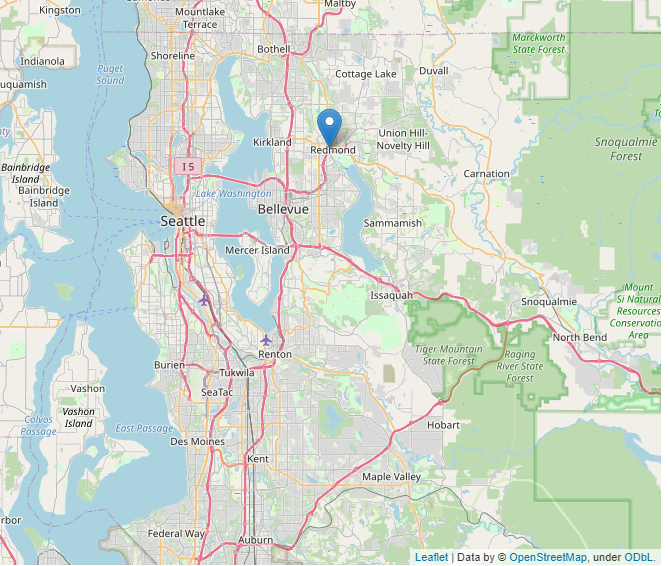

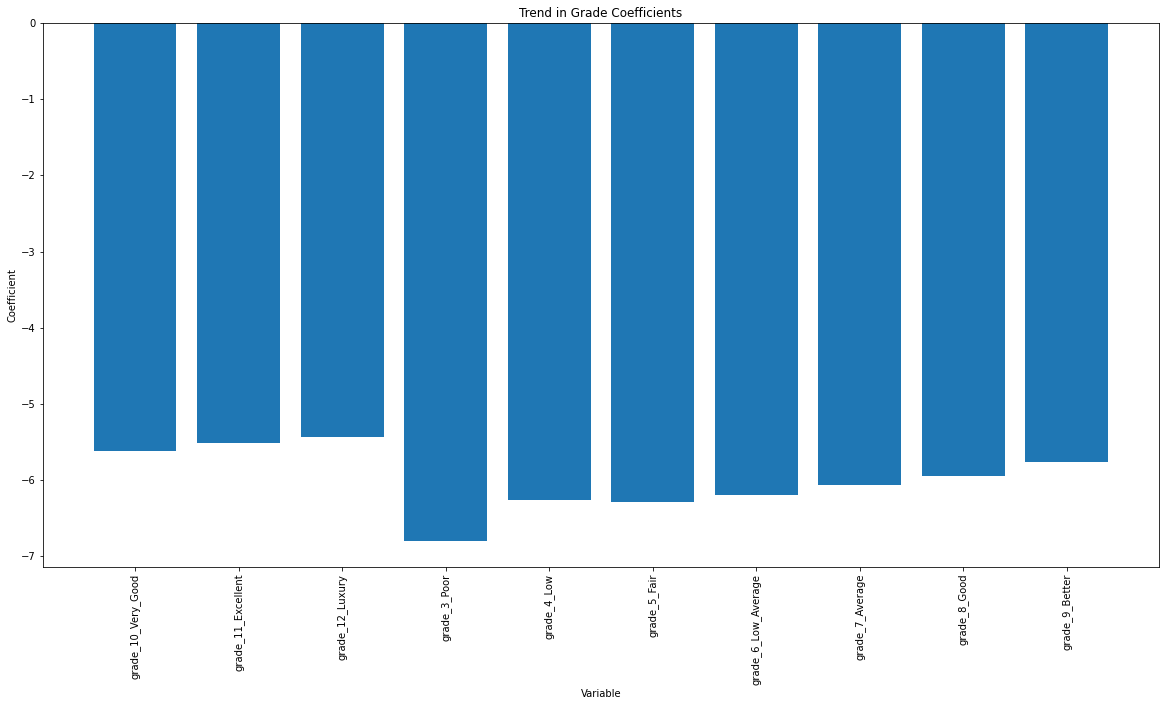

In [173]:
# Create a DataFrame with the coefficients
coefficients = {
    'variable': ['grade_10_Very_Good', 'grade_11_Excellent',
                 'grade_12_Luxury', 'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average',
                 'grade_7_Average', 'grade_8_Good', 'grade_9_Better'],
    'coefficient': [-5.6139, -5.5205, -5.4393, -6.8012, -6.2589,
                    -6.2931, -6.1939, -6.0712, -5.9432, -5.7583]
}
coefficients_df = pd.DataFrame(coefficients)

# Create a bar plot of the coefficients
plt.figure(figsize=(20, 10))
plt.bar(x='variable', height='coefficient', data=coefficients_df)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Trend in Grade Coefficients')
plt.show()

# Next Steps

- Looking further into how to transform the data for better distribution metrics would be ideal. 
- I would recommend looking into the location of the homes as they compare to prices further. Using zipcodes, population density, and distance from Seattle city proper could factor into the price increasing
- For any of the renovated homes, it would be nice to see what specifically was changed. We could compare the square footage of the living space before and after the renovation. 